In [1]:
from globalfit_functions import *
import numpy as np
import matplotlib.pyplot as plt
import jax.numpy as jnp
#Import required packages
import jax                                                #numpy on CPU/GPU/TPU
import sys                                                #allows for command line arguments to be run with the script
import arviz as az                                        #for saving Bayesian Data
import jax.numpy as jnp                                   #jnp regularly called (ease of use)
from jax.random import PRNGKey                            #pseudo-random number generator (ease of use)
import numpyro                                            #Bayesian inference package
from numpyro.infer import MCMC, NUTS, Predictive          #MCMC with NUTS to make it Hamiltonian MC
from numpyro.distributions import TruncatedNormal, Normal #To define prior distributions

No GPU/TPU found, falling back to CPU. (Set TF_CPP_MIN_LOG_LEVEL=0 and rerun for more info.)


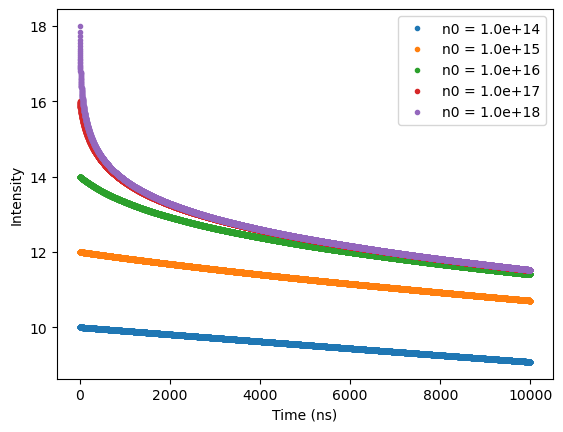

In [2]:
#Simulate data using ABC model
time = np.linspace(0, 10000, 10000)
n0s = [1e14, 1e15, 1e16, 1e17, 1e18]
p_cons = 1e-18
k_A = 1e-4
k_B = 1e-19
k_C = 1e-37
bkr = 1e-5

signals = np.zeros((len(n0s)+1, len(time)))
signals[0] = time
for i, n0 in enumerate(n0s):
    signal = TRPL_ABC(time, n0, p_cons, k_A, k_B, k_C, bkr)
    #signal = add_noise(signal)
    #signal = standardise(signal)
    plt.plot(time, signal,'.', label='n0 = {:.1e}'.format(n0))
    
    plt.xlabel('Time (ns)')
    plt.ylabel('Intensity')
    plt.legend()
    signals[i+1] = signal[0]    

plt.show()
np.save('ABC_Simulated.npy',signals)

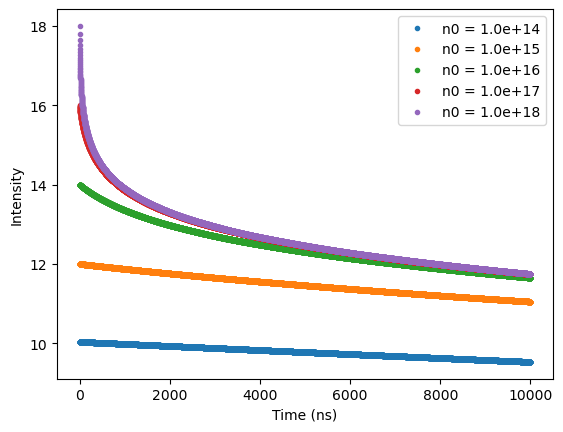

In [3]:
#Simulate data using ABC model
time = np.linspace(0, 10000, 10000)
n0s = [1e14, 1e15, 1e16, 1e17, 1e18]
p_cons = 1e-18
ka = 1e-37
kt = 1e-19
kb = 1e-19
kdt = 1e-18
kdp = 1e-19
NT = 1e15
p0 = 1e13
bkr = 1e2


signals = np.zeros((len(n0s)+1, len(time)))
signals[0] = time
for i, n0 in enumerate(n0s):
    signal = TRPL_Extended_Model(time, p_cons, ka, kt, kb, kdt, kdp, NT, p0, bkr, n0)
    #signal = add_noise(signal)
    #signal = standardise(signal)
    plt.plot(time, signal,'.', label='n0 = {:.1e}'.format(n0))
    
    plt.xlabel('Time (ns)')
    plt.ylabel('Intensity')
    
    plt.legend()
    signals[i+1] = signal[0]
    
plt.show()
np.save('Extended_Simulated.npy',signals)